In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# 폰트 설정
plt.rc("font", family= "Malgun Gothic") 
plt.rc("axes", unicode_minus = False)  # '-' 값이 깨지지 

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [105]:
df = pd.read_csv('bts_lyrics_data.csv')
df.head()

,release_date,artist,series,album_name,song_name,genre,like_count,lyrics
0,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,Intro : 2 COOL 4 SKOOL (Feat. DJ Friz),"랩/힙합, 발라드","53,321",We're now going to progress\nto some steps whi...
1,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,We Are Bulletproof PT.2,"랩/힙합, 발라드","79,189",What 이리 내놔\nWhat 긴장해 다\nWhat 끝판대장\nWhat We are...
2,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,Skit : Circle Room Talk,"랩/힙합, 발라드","50,314",랩몬스터: 대박이었다니까 그때는 그게\n\n제이홉: 2006년\n\n랩몬스터: Fl...
3,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,No More Dream,"랩/힙합, 발라드","96,551",얌마 니 꿈은 뭐니\n얌마 니 꿈은 뭐니\n얌마 니 꿈은 뭐니\n니 꿈은 겨우 그거...
4,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,Interlude,"랩/힙합, 발라드","52,210",[가사 준비중] 멜론 회원 여러분! 가사 등록을 기다리고 있어요.\n가사등록하기


In [4]:
df.tail()

,release_date,artist,series,album_name,song_name,genre,like_count,lyrics
199,2020.11.20,방탄소년단,COVID_19,BE,Skit,"랩/힙합, 댄스, 발라드, R&B/Soul","61,701",[가사 준비중] 멜론 회원 여러분! 가사 등록을 기다리고 있어요.\n가사등록하기
200,2020.11.20,방탄소년단,COVID_19,BE,잠시,"랩/힙합, 댄스, 발라드, R&B/Soul","106,026",매번 같은 하루들 중에\n너를 만날 때 가장 난 행복해\n매번 다른 일상들 속에\n...
201,2020.11.20,방탄소년단,COVID_19,BE,병,"랩/힙합, 댄스, 발라드, R&B/Soul","95,621",뭔가 놓친듯해\n커피 한 모금으로 불안함을 해소\nAn endless rest\n내...
202,2020.11.20,방탄소년단,COVID_19,BE,Stay,"랩/힙합, 댄스, 발라드, R&B/Soul","94,978",꿈이었을까\n널 본 것 같아\n눈뜨면 다시\n아무도 없는 방\n\n가만히 난 주문을...
203,2020.11.20,방탄소년단,COVID_19,BE,Dynamite,"랩/힙합, 댄스, 발라드, R&B/Soul","51,141",Cos ah ah I’m in the stars tonight\nSo watch m...


In [5]:
df.shape

(204, 8)

In [6]:
# 결측치
df.isnull().sum()

release_date    0
artist          0
series          0
album_name      0
song_name       0
genre           0
like_count      0
lyrics          0
dtype: int64

In [7]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_date  204 non-null    object
 1   artist        204 non-null    object
 2   series        204 non-null    object
 3   album_name    204 non-null    object
 4   song_name     204 non-null    object
 5   genre         204 non-null    object
 6   like_count    204 non-null    object
 7   lyrics        204 non-null    object
dtypes: object(8)
memory usage: 12.9+ KB


In [8]:
df.describe()

,release_date,artist,series,album_name,song_name,genre,like_count,lyrics
count,204,204,204,204,204,204,204,204
unique,14,1,6,14,148,6,178,153
top,2018.08.24,방탄소년단,love_yourself,LOVE YOURSELF 結 'Answer',전하지 못한 진심 (Feat. Steve Aoki),랩/힙합,"59,743",무언가 깨지는 소리\n난 문득 잠에서 깨\n낯설음 가득한 소리\n귀를 막아보지만 잠...
freq,52,204,72,52,3,126,2,3


In [106]:
# [가사준비중] - 가사가 없는 행 제거
print(df.shape)
df = df[~df['lyrics'].str.contains('가사 준비중')]
df.shape

(204, 8)


(201, 8)

In [10]:
df.head()

,release_date,artist,series,album_name,song_name,genre,like_count,lyrics
0,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,Intro : 2 COOL 4 SKOOL (Feat. DJ Friz),"랩/힙합, 발라드","53,321",We're now going to progress\nto some steps whi...
1,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,We Are Bulletproof PT.2,"랩/힙합, 발라드","79,189",What 이리 내놔\nWhat 긴장해 다\nWhat 끝판대장\nWhat We are...
2,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,Skit : Circle Room Talk,"랩/힙합, 발라드","50,314",랩몬스터: 대박이었다니까 그때는 그게\n\n제이홉: 2006년\n\n랩몬스터: Fl...
3,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,No More Dream,"랩/힙합, 발라드","96,551",얌마 니 꿈은 뭐니\n얌마 니 꿈은 뭐니\n얌마 니 꿈은 뭐니\n니 꿈은 겨우 그거...
5,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,좋아요,"랩/힙합, 발라드","124,787",Wanna be loved\nDon't wanna be fool wanna\nbe ...


*** 
# 전처리

In [107]:
# lyrics 컬럼의 \n -> ' ' replace

df['lyrics'] = df['lyrics'].apply(lambda x : x.replace('\n',' '))

In [12]:
df['lyrics'][30]

"It was a new world 평소에 글이나 시나 끄적이던 내게 심청이마냥 급 다가와 내가 못 뜨던 새 눈을 뜨게 했네 But people keep askin' baby why you love that HIPHOP 쉿 그럼 나는 말해 이윤 원래 없어 cause it's HIPHOP 별 거 없어 에픽하이 남들처럼 Jay Z나 클래식한 Illmatic과 Doggystyle In My Mind 또한 KRS ONE 또 Ready to die Eminem과 The Chronic과 그 다음 명작 2001 Gang Starr Black Star Eric B Rakim Pete Rock and CL smooth They juss keep poppin 달고 살았어 아주 많이 그때의 난 아주머니 할 말이 많아서 남들이 해주는 이야기론 부족하다 느꼈지 일단은 억지 거짓 덕지덕지 발라 가사랍시고 썼지 And that was it uh that was it 내가 내가 된 시점 학습지 사이 백지에 모두 아는 날 잠시 끼워 그리고 지웠어 비웠어 비트 위에서 만큼은 난 자유로워 7년 전이나 지금이나 똑같아 이게 제일 나다워 I'll be down for your rap I'll be down for your rhythm 여전히 내 심장을 뛰게 해 내가 진짜 나이고 싶게 해 Yeah I love this Hip Hop 사람 냄새가 나는 Hip Hop 인생으로 써내려가는 Hip Hop 이제는 삶의 일부가 된 Hip Hop Yeah this ma Hip Hop Yo ma Hiphop 입학 몸으로 느끼며 개입함 부갈루 킹텃 올드스쿨 리듬 타 빅히트 위탁에 rhyme과 혀를 밀착 두각을 나타내 지금은 랩 댄스 교집합 Yeah ma role model 다듀 버벌 with 에픽 하이 서툰 날 이력서 써 무명 깨 무댈 fly 아무것도 모른 날 일으켰지 매일 내 맘을 울린 Artist Ring 몸으로 표현만 했었던 비기와 투팍 and 나스 날 더 알아갔지 uh Hope hope world 내 세상을

## 한국어 형태소 분석

In [108]:
# 2. 한국어 형태소 추출
from konlpy.tag import Okt
from collections import Counter
okt = Okt()  
    
df['lyrics'] = df['lyrics'].apply(lambda x : okt.nouns(x))
df['lyrics'].head()

0    [방탄소년단, 십, 이십, 대신, 우리, 얘길, 해, 십, 이십, 대신, 우리, 얘...
1    [긴장, 끝판, 대장, 이름, 스케일, 전국, 학교, 대신, 연습실, 밤새, 춤, ...
2    [랩, 몬스터, 대박, 그때, 그게, 제이, 홉, 랩, 몬스터, 진, 최고, 뮤직비...
3    [얌마, 니, 꿈, 뭐, 얌마, 니, 꿈, 뭐, 얌마, 니, 꿈, 뭐, 니, 꿈, ...
5    [너, 니, 모든, 사진, 남발, 처음, 저, 남자, 누구, 나, 이제, 남자친구,...
Name: lyrics, dtype: object

## 불용어 제거

In [120]:
# 불용어 

removewords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
print(len(removewords))

add = ['더','둘','셋', '내', '너', '난', '더','나','우리','니','지민','랩몬','슈가', '뷔', '정국','진', '수가', 
       '랩몬스터','렙몬', '호석','제이','홉', '제이홉','우리','그게','길이', '넌'] # 더 추가하고 싶은 단어가 있을 시 추가한다.

for i in add:
    removewords.append(i)
    
print(len(removewords))
print(removewords[:20])

674
701
[['휴'], ['아이구'], ['아이쿠'], ['아이고'], ['어'], ['나'], ['우리'], ['저희'], ['따라'], ['의해'], ['을'], ['를'], ['에'], ['의'], ['가'], ['으로'], ['로'], ['에게'], ['뿐이다'], ['의거하여']]


In [121]:
def remove_stopwords(text):
    for i in text:
        if i in removewords:
            text.remove(i)
    return text

In [122]:
len(df['lyrics'][30])

173

In [123]:
# for text in df['lyrics']:
#     remove_one_word(text)

df['lyrics'] = df['lyrics'].apply(remove_stopwords)

In [124]:
len(df['lyrics'][30])

172

## 길이가 1 인 글자 제거

In [114]:
# 한 글자 중 제거하지 않을 글자들은 one_word 변수에 넣는다.

one_word = ['첫', '몸', '춤','꿈', '잠', '맘', '집', '차', '삶', '일', '길', '겁', '돈', '술', '팬', '향', '맛',
            '랩', '힘', '벌', '불', '정', '멋', '밥','꽃', '숲', '빛','왜','말','별', '달','비', '숨','색', '밤','새',
            '땀', '피', '부', '욕', '섬','끝']

In [131]:
def remove_one_word(text): 
    for i in text:
        if len(i) <2:
            if i not in one_word:
                text.remove(i)
    return text

In [132]:
len(df['lyrics'][30])

159

In [133]:
 # 4. 필요한 한 글자 단어 제외한 한글자 제거 

# 방법1)
# for text in df['lyrics']:
#     remove_one_word(text)

# 방법2)
df['lyrics'] = df['lyrics'].apply(remove_one_word) 

In [134]:
len(df['lyrics'][30])

158

In [136]:
print(df['lyrics'][30])

['평소', '시나', '심청', '이마', '새', '말', '이윤', '원래', '별', '에픽하이', '클래식', '또한', '다음', '명작', '달', '아주', '그때', '아주머니', '말', '이야기', '일단', '억지', '거짓', '덕지덕지', '발라', '가사', '랍시고', '시점', '학습', '사이', '백지', '모두', '잠시', '비트', '전이', '지금', '제일', '심장', '진짜', '나이', '사람', '냄새', '인생', '이제', '삶', '일부', '입학', '몸', '개입', '부갈루', '킹텃', '올드스쿨', '리듬', '빅히트', '위탁', '밀착', '지금', '랩', '댄스', '교집합', '다듀', '버벌', '에픽', '하이', '이력서', '무명', '매일', '맘', '몸', '표현', '투팍', '나스', '세상', '만들기', '금요일', '밤', '영감', '음악', '매일', '테두릴', '삶', '최고', '뮤지션', '딕션', '본능', '랩', '춤', '감각', '교감', '삶', '공간', '힙합', '오늘', '몸', '심장', '진짜', '나이', '사람', '냄새', '인생', '이제', '삶', '일부', '힙합', '엄마', '자연', '삶', '당시', '초등학생', '일', '꿈', '재단', '삶', '혐오', '꼬맹이', '주위', '모두', '만류', '자리', '고수', '힙합', '송두리째', '교과서', '귀퉁이', '덕분', '안정', '삶', '뿌리', '대구', '남산동', '작업실', '무딘', '펜촉', '노력', '끝', '학창시절', '대신', '빼곡', '주위', '힙합', '전부', '결과', '인생', '자체', '음악', '문화', '사랑', '라면', '골백번', '심장', '진짜', '나이', '사람', '냄새', '인생', '이제', '삶', '일부']


## summary

In [41]:
from konlpy.tag import Okt
from collections import Counter
okt = Okt()  

# [불용어] 
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
add = ['더','둘','셋', '내', '너', '난', '더','나','우리','니','지민','랩몬','슈가', '뷔', '정국','진', '수가', 
       '랩몬스터','렙몬', '호석','제이','홉', '제이홉','우리','그게','길이'] # 더 추가하고 싶은 단어가 있을 시 추가한다.
for s in add:
    stopwords.append(s)

# [필요한 한글자 단어] # 눈, 손
one_word = ['첫', '몸', '춤','꿈', '잠', '맘', '집', '차', '삶', '일', '길', '겁', '돈', '술', '팬', '향', '맛',
            '랩', '힘', '벌', '불', '정', '멋', '밥','꽃', '숲', '빛','왜','말','별', '달','비', '숨','색', '밤','새',
            '땀', '피', '부', '욕', '섬','끝']
    
# 불용어 제거 함수     
def remove_stopwords(text):
    for i in text:
        if i in stopwords:
            text.remove(i)
    return text   

# 한글자 제거 함수
def remove_one_word(text): 
    for i in text:
        if len(i) <=1:
            if i not in one_word:
                text.remove(i)
    return text
    
# 데이터에 적용
df['lyrics'] = df['lyrics'].apply(lambda x : x.replace('\n',' '))
df['lyrics'] = df['lyrics'].apply(lambda x : okt.nouns(x))
df['lyrics'] = df['lyrics'].apply(remove_stopwords)
df['lyrics'] = df['lyrics'].apply(remove_one_word) 

In [44]:
df.head()

,release_date,artist,series,album_name,song_name,genre,like_count,lyrics
0,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,Intro : 2 COOL 4 SKOOL (Feat. DJ Friz),"랩/힙합, 발라드","53,321","[방탄소년단, 이십, 대신, 얘길, 십, 이십, 대신, 얘길]"
1,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,We Are Bulletproof PT.2,"랩/힙합, 발라드","79,189","[긴장, 끝판, 대장, 이름, 스케일, 전국, 학교, 대신, 연습실, 밤새, 춤, ..."
2,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,Skit : Circle Room Talk,"랩/힙합, 발라드","50,314","[랩, 몬스터, 대박, 그때, 랩, 몬스터, 최고, 뮤직비디오, 그거, 대박, 흰색..."
3,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,No More Dream,"랩/힙합, 발라드","96,551","[얌마, 꿈, 얌마, 꿈, 얌마, 꿈, 꿈, 겨우, 그거, 사실, 하하, 꿈, 따위..."
5,2013.06.12,방탄소년단,school,2 COOL 4 SKOOL,좋아요,"랩/힙합, 발라드","124,787","[모든, 사진, 남발, 처음, 남자, 누구, 이제, 남자친구, 번호, 전화, 카톡,..."


In [104]:
print(len(df['lyrics'][20]))
print(df['lyrics'][20])

149
['어디', '가시', '나야', '어데', '지금', '어데', '가노', '살이', '누나', '아이', '그캄', '오빠', '작살', '얼굴', '해', '리하', '사라다', '쌔그랍', '생기', '쪼매', '밥', '대기', '아이', '커피', '바리', '커피', '안나', '코', '아따', '이뻐잉', '보고', '그냥', '기뻐잉', '큐피트', '화살', '맘', '찍어잉', '아따', '고', '남정', '허뻐', '러브', '고함', '누가', '얼른', '봐브러야제', '그냥', '먼저', '브러', '어디', '이름', '정말', '어디', '이름', '수', '정말', '부산', '광주', '여기', '서울', '저기', '제주도', '사랑', '고마', '궁디', '주차', '뿌기', '맘', '점', '그냥', '금마', '때매', '카나', '나뚜', '타카', '씅나', '가스나', '장난', '눈', '머', '스마', '천지', '쌔리삐', '쫌', '금', '마는', '내', '맘', '이제', '삐', '오메', '오메', '가시', '지금', '심', '상치', '않어잉', '고요', '자꾸', '심장', '벌벌', '덜덜', '숨', '컥컥', '시방', '지금', '시기', '거', '지금', '맘', '온통', '시기', '아따', '전라도', '남자', '디', '어디', '이름', '수', '정말', '어디', '이름', '수', '정말', '달', '별', '해도', '걸', '넌', '여자', '남자', '사랑', '수', '거', '어디', '이름', '수', '정말', '어디', '이름', '수', '정말', '부산', '광주', '여기', '서울', '저기', '제주도', '사랑']


In [45]:
# 시리즈별 곡 수 
df['series'].value_counts()

love_yourself      72
school             40
wings              33
youth              29
map_of_the_soul    20
COVID_19            7
Name: series, dtype: int64

# 워드 클라우드
* github link : https://github.com/amueller/word_cloud
* reference : https://ichi.pro/ko/python-eseo-sayongja-jijeong-dan-eo-guleum-mandeulgi-145227399773811

In [ ]:
contour_color='steelblue'

In [140]:
# 워드 클라우드 함수 만들기

from wordcloud import WordCloud
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from PIL import Image
import numpy as np

def wordcloud(data, width=1400, height=650):
    custom_mask = np.array(Image.open("BTS_LOGO.PNG"))
    
    wordcloud = WordCloud(
    font_path = 'c:\\windows\\fonts\\NanumGothic.ttf',
    width=width, height =height,
    stopwords = ['지민','랩몬','슈가', '뷔', '정국','진', '수가', '랩몬스터','렙몬', '호석','제이',
                 '홉', '제이홉','우리','그게','길이', '해도', '수로','거란','우린', '하나'], # 빼고 싶은 단어들 넣기 
    background_color='white',
    mask=custom_mask, # 이미지 모양 
    max_words = 120, # 허용되는 최대 단어, 200이 기본값 
    random_state=42, # 실행할때마다 바뀌지않고 같은 워드클라우드가 시각화 됨
    # contour_color='steelblue' # 테두리 유뮤 & 색상
     )

    
    wordcloud.generate_from_frequencies(data)
    image_colors = ImageColorGenerator(custom_mask)
    wordcloud.recolor(color_func=image_colors)
    plt.figure(figsize =(9,9))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") # 축 그리지 않는다.

In [155]:
# 워드 클라우드 ver.2 
def wordcloud2(data, width=1400, height=650):
    custom_mask = np.array(Image.open("cd.PNG"))
    
    wordcloud = WordCloud(
    font_path = 'c:\\windows\\fonts\\NanumGothic.ttf',
    width=width, height =height,
    stopwords = ['지민','랩몬','슈가', '뷔', '정국','진', '수가', '랩몬스터','렙몬', '호석','제이',
                 '홉', '제이홉','우리','그게','길이', '해도', '수로','거란','우린', '하나'], # 빼고 싶은 단어들 넣기 
    background_color='white',
    mask=custom_mask, # 이미지 모양 
    max_words = 120, # 허용되는 최대 단어, 200이 기본값 
    random_state=42 # 실행할때마다 바뀌지않고 같은 워드클라우드가 시각화 됨
     )

    
    wordcloud.generate_from_frequencies(data)
    image_colors = ImageColorGenerator(custom_mask)
    wordcloud.recolor(color_func=image_colors)
    plt.figure(figsize =(9,9))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") # 축 그리지 않는다.

## School Series - wordcloud

In [95]:
from collections import Counter

# '[]' 기준으로 합쳐주다
# 글자 개수를 Counter를 이용해 합쳐준다
# 딕셔너리 타입으로 바꿔준다

school_text = dict(Counter(sum(df.loc[df['series']=='school','lyrics'],[])))

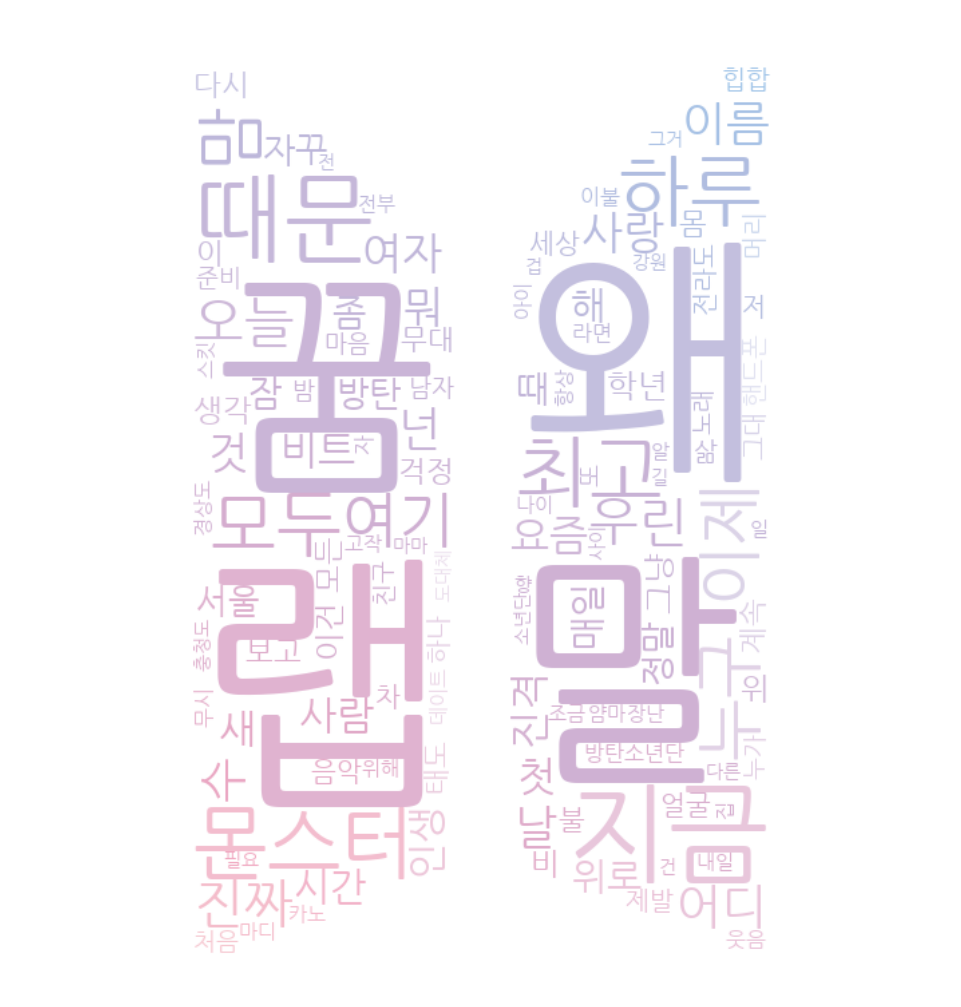

In [96]:
wordcloud(school_text)

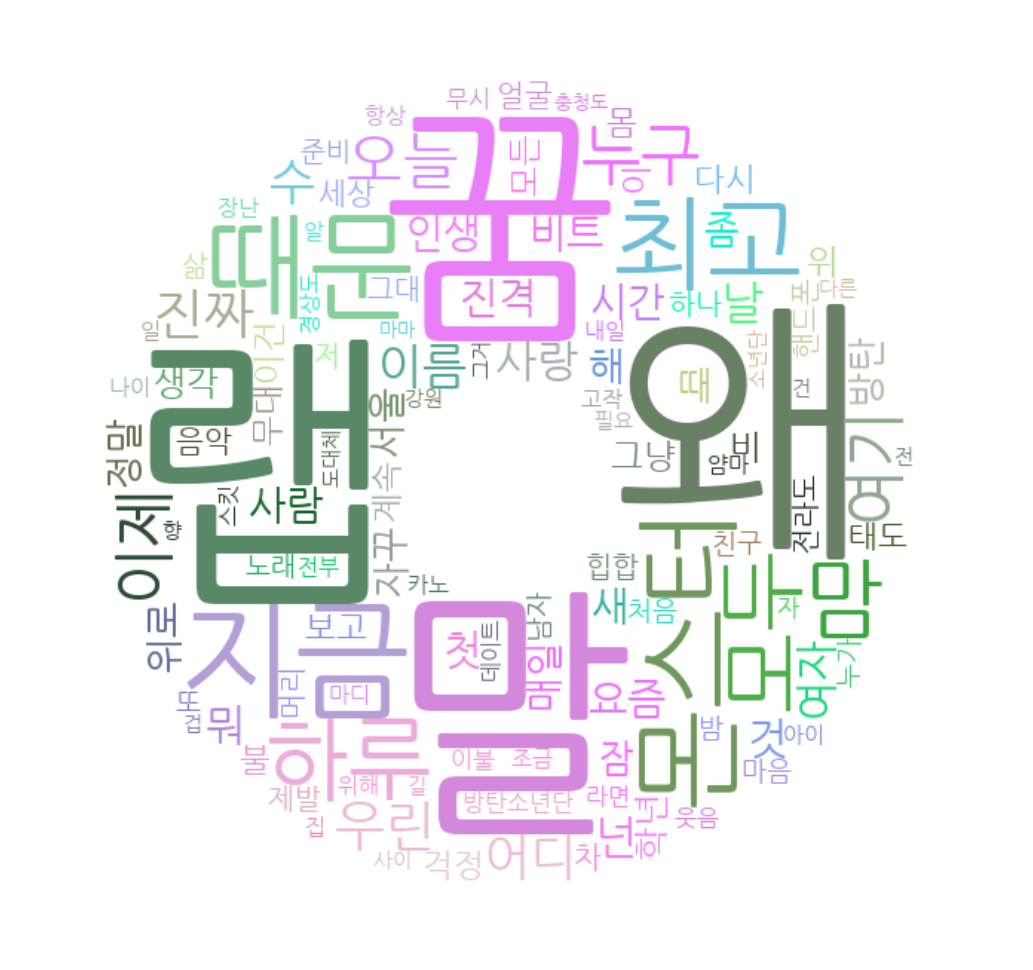

In [156]:
wordcloud2(school_text)

## Youth Series - wordcloud

In [138]:
from collections import Counter

# '[]' 기준으로 합쳐주다
# 글자 개수를 Counter를 이용해 합쳐준다
# 딕셔너리 타입으로 바꿔준다

youth_text = dict(Counter(sum(df.loc[df['series']=='youth','lyrics'],[])))

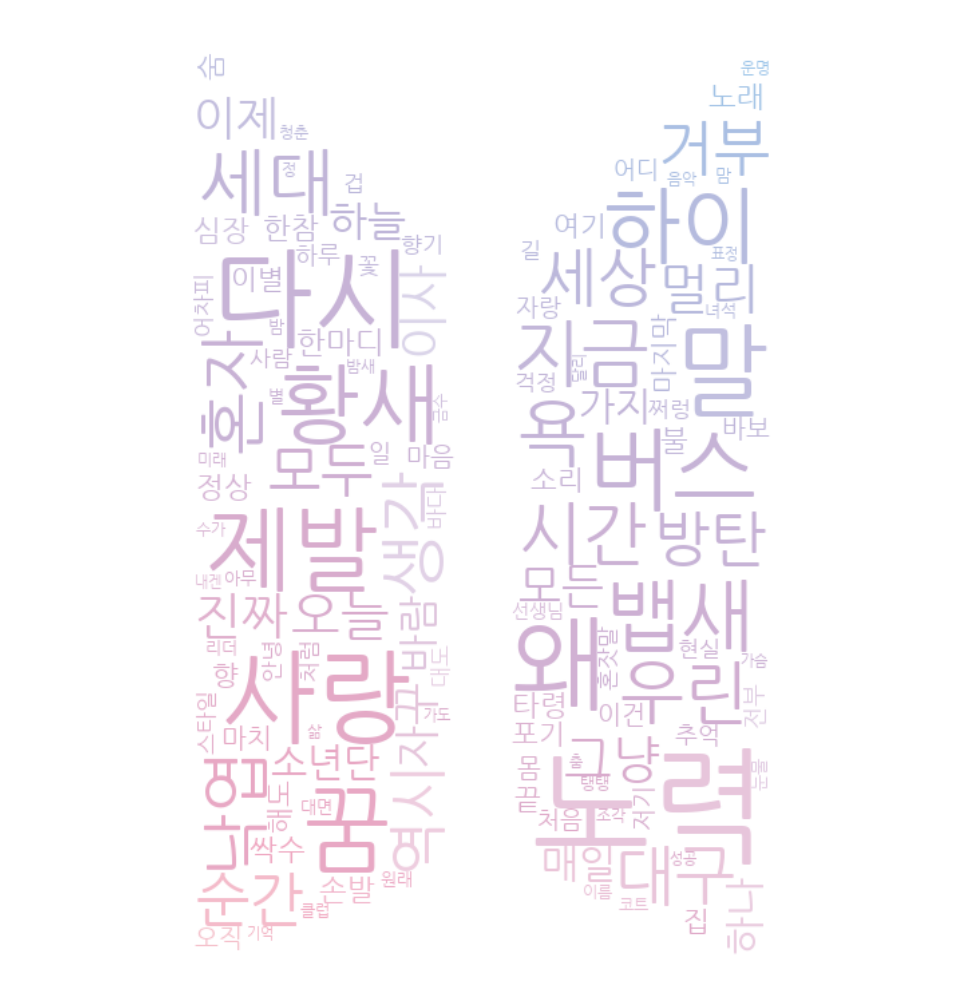

In [141]:
wordcloud(youth_text)

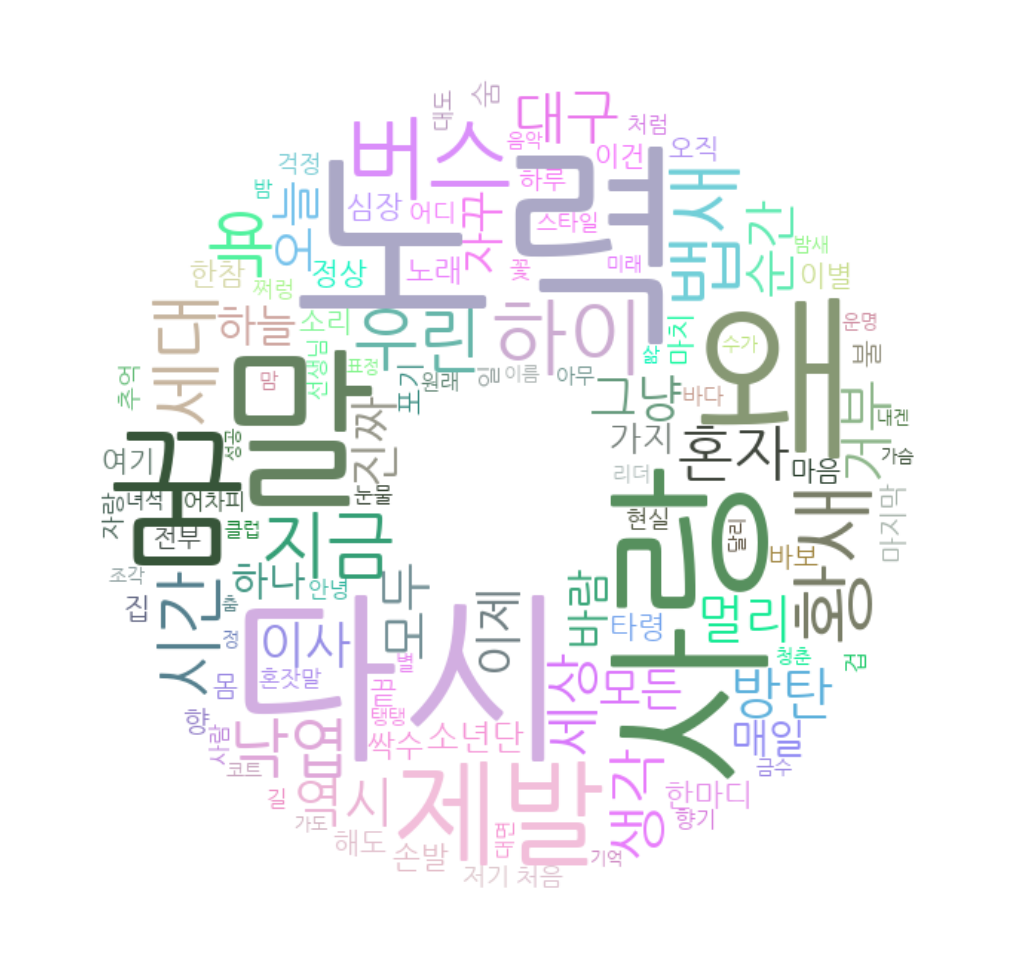

In [157]:
wordcloud2(youth_text)

## Wings Series - wordcloud

In [142]:
wings_text = dict(Counter(sum(df.loc[df['series']=='wings','lyrics'],[])))

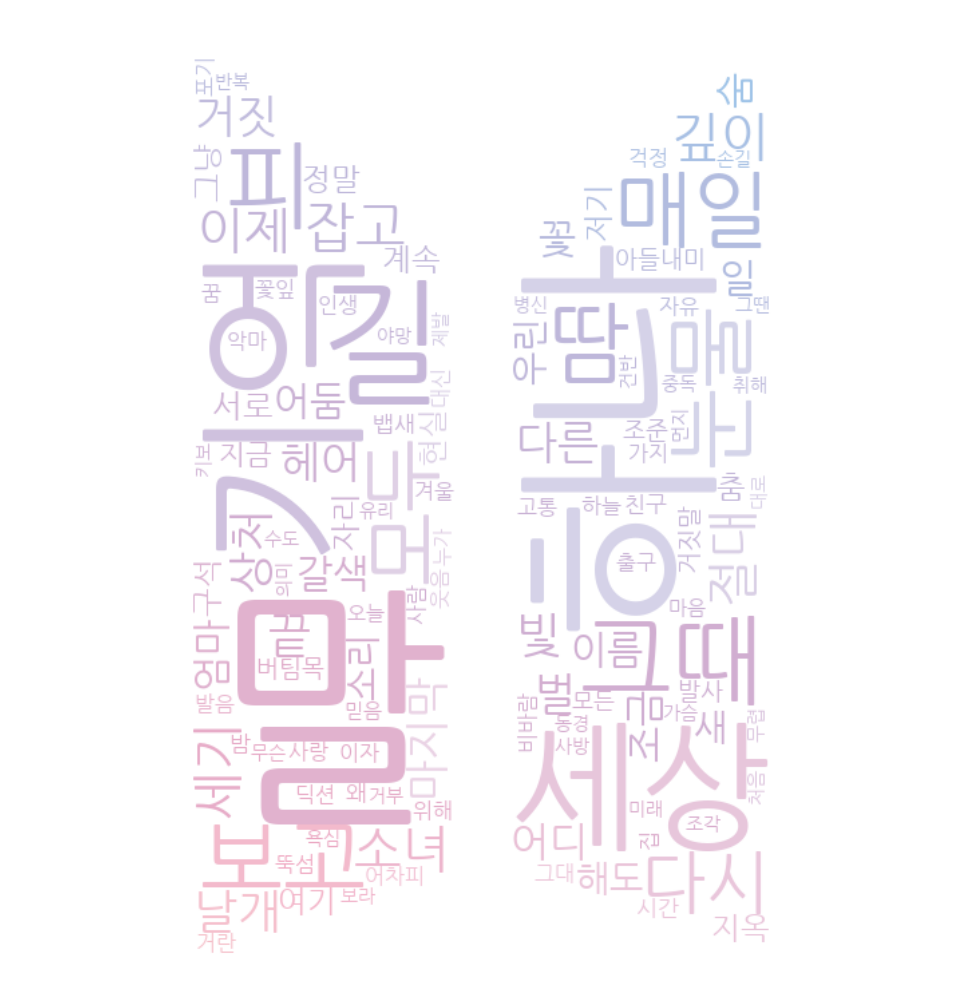

In [143]:
wordcloud(wings_text)

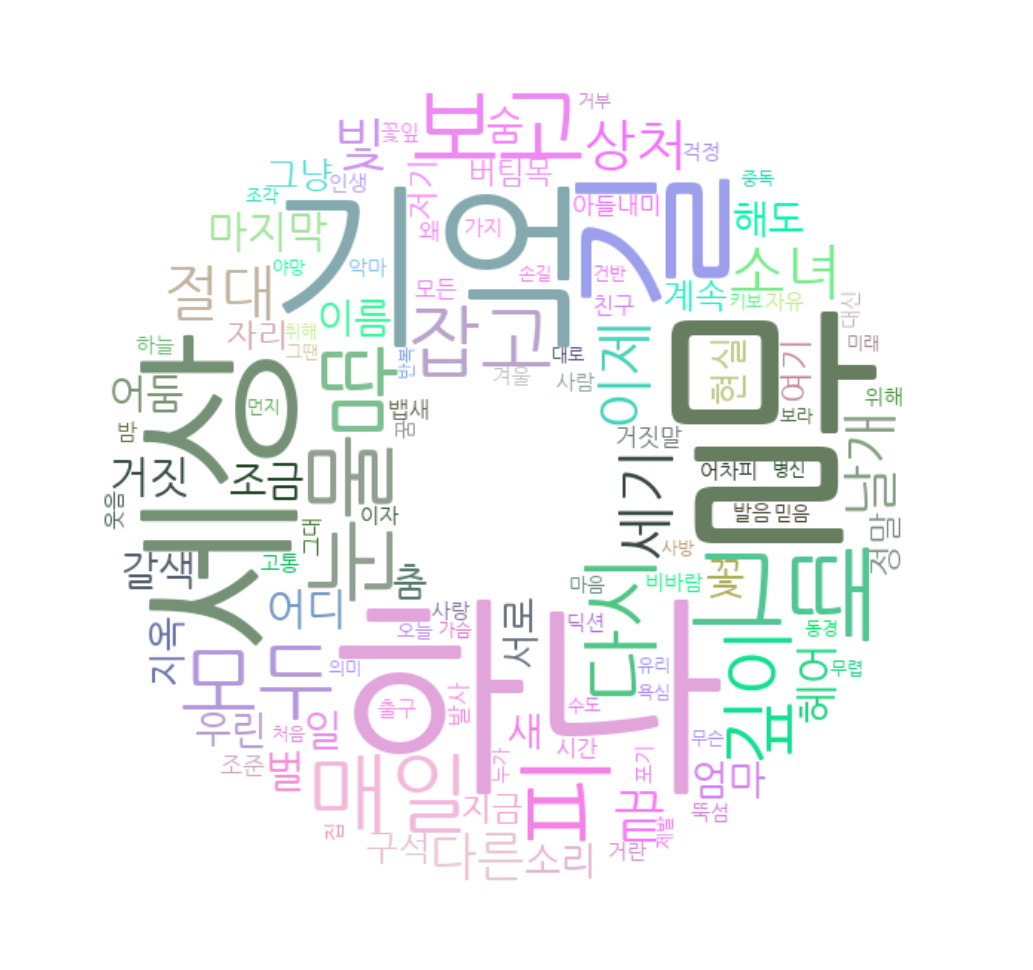

In [158]:
wordcloud2(wings_text)

## Love Yourself Series - wordcloud

In [144]:
love_yourself_text = dict(Counter(sum(df.loc[df['series']=='love_yourself','lyrics'],[])))

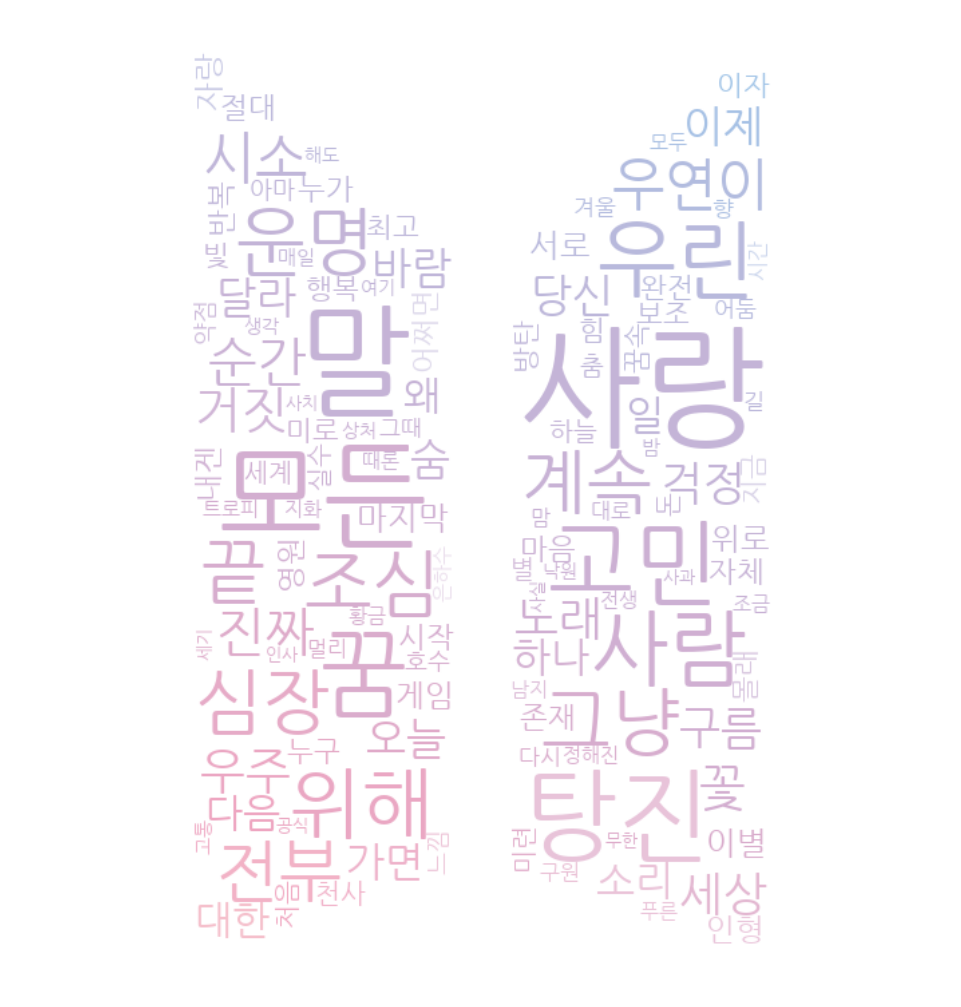

In [145]:
wordcloud(love_yourself_text)

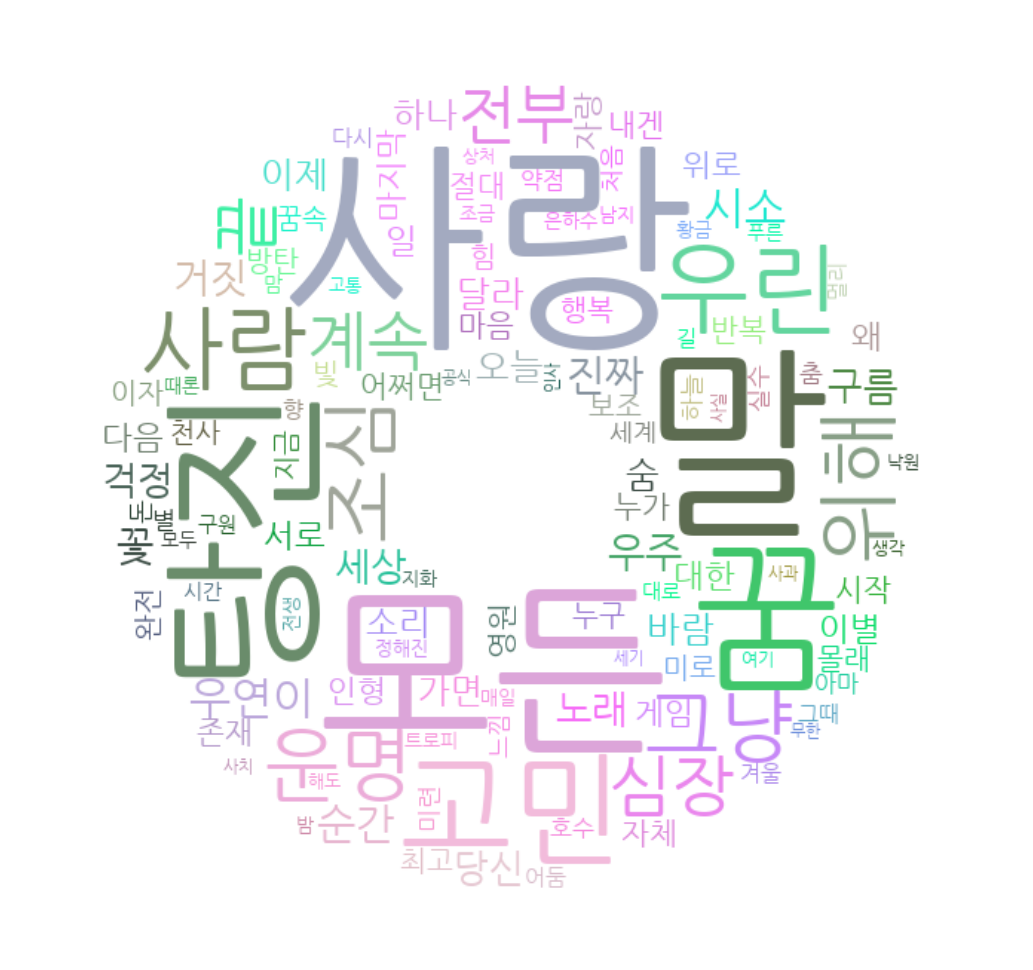

In [159]:
wordcloud2(love_yourself_text)

## Map of the soul Series - wordcloud

In [151]:
map_of_the_soul_text = dict(Counter(sum(df.loc[df['series']=='map_of_the_soul','lyrics'],[])))

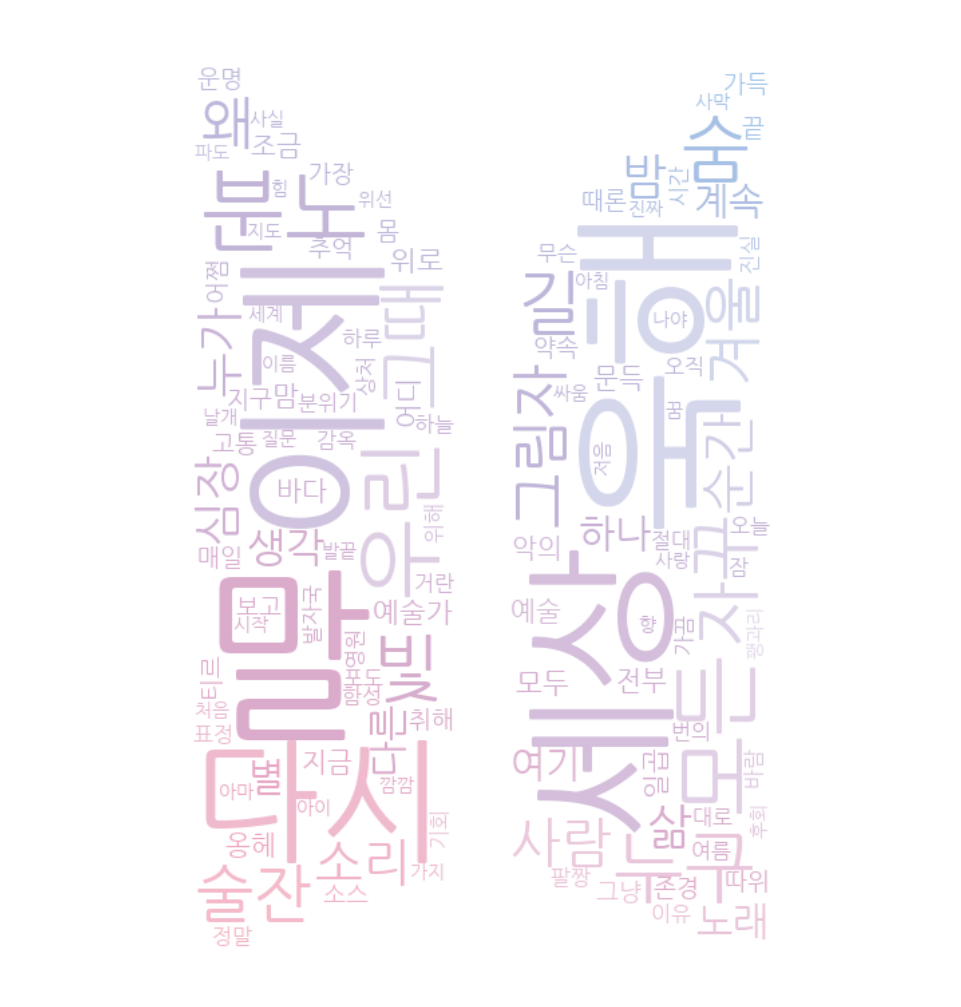

In [152]:
wordcloud(map_of_the_soul_text)

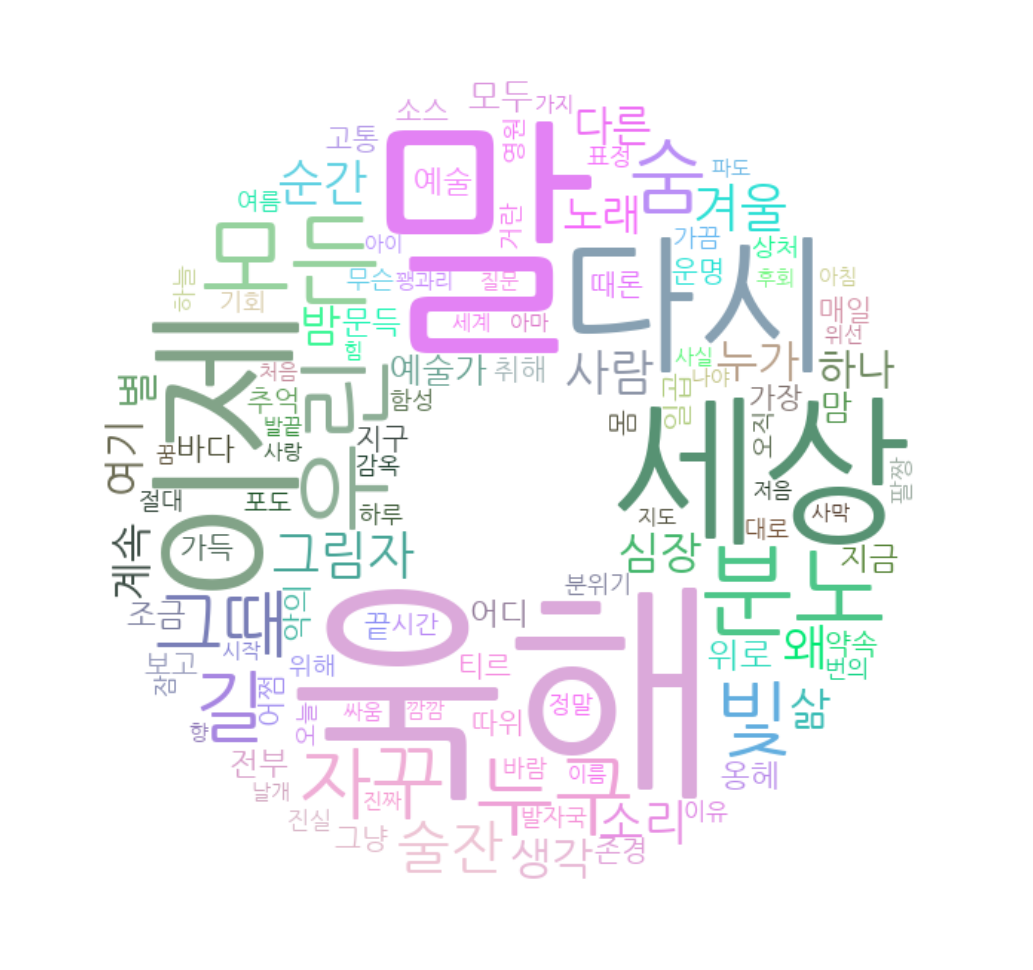

In [160]:
wordcloud2(map_of_the_soul_text)

## COVID-19 

In [153]:
covid19_text = dict(Counter(sum(df.loc[df['series']=='COVID_19','lyrics'],[])))

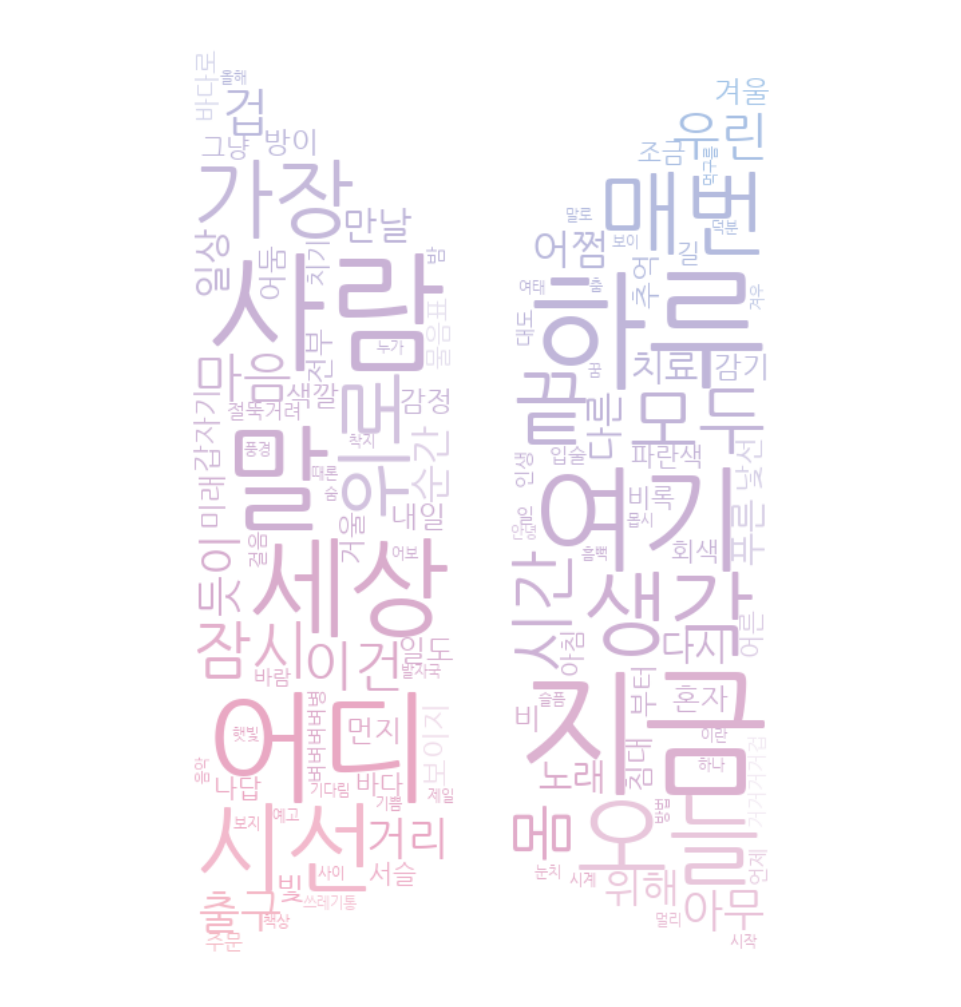

In [154]:
wordcloud(covid19_text)

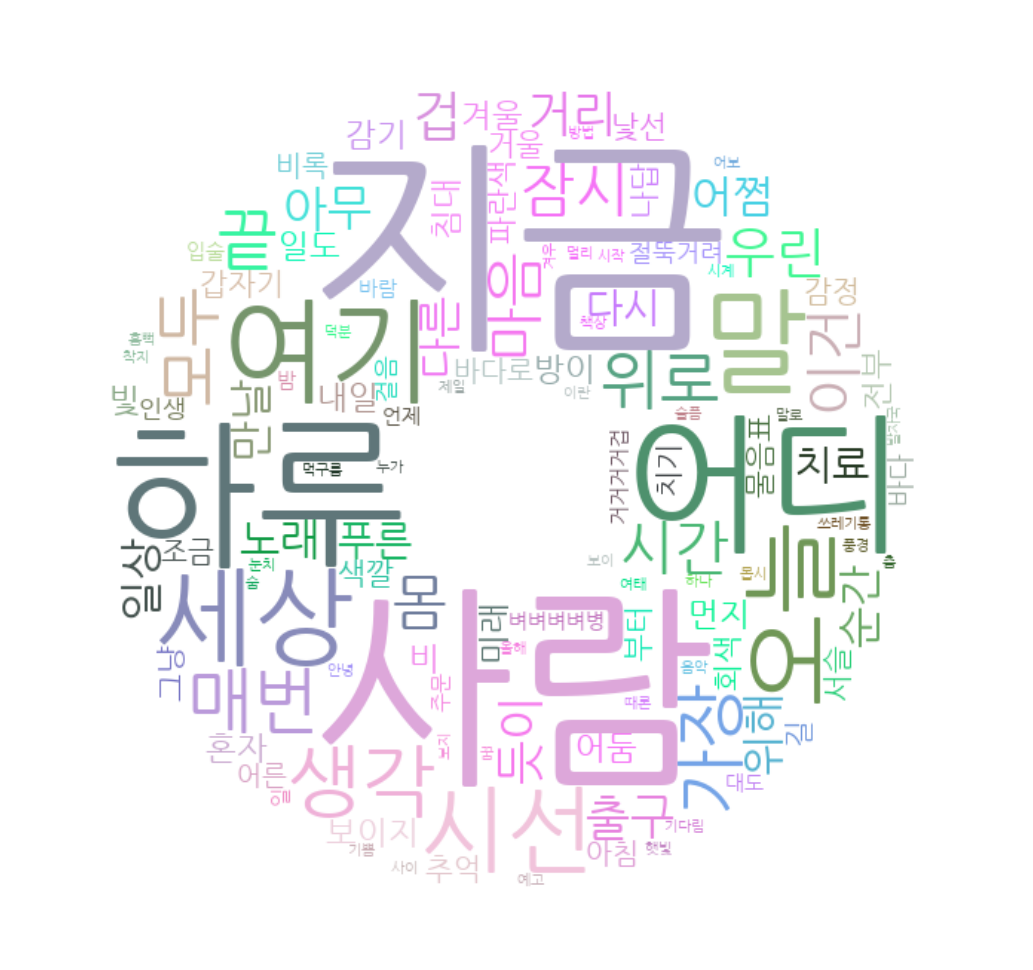

In [161]:
wordcloud2(covid19_text)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
new_df = pd.DataFrame()
for df_index in range(len(df)):
    lyrics = df.loc[df_index, "lyrics"]
    for lyric in lyrics:
        data = {
            "release_date": df.loc[df_index, "release_date"],
            "artist"      : df.loc[df_index, "artist"],
            "series"      : df.loc[df_index, "series"],
            "album_name"  : df.loc[df_index, "album_name"],
            "song_name"   : df.loc[df_index, "song_name"],
            "genre"       : df.loc[df_index, "genre"],
            "like_count"  : df.loc[df_index, "like_count"],
            "lyrics"      : lyric
        }
        new_df = new_df.append(data, ignore_index=True)

In [ ]:
pd.DataFrame().append({"abc": 1}, ignore_index=True)

In [ ]:
new_df.head(20)

In [ ]:
final_bts_df = new_df.copy()

In [ ]:
final_bts_df.to_csv('final_bts_df.csv', index=False)

In [ ]:
# 단어 빈도수

plt.figure(figsize=(14,4))
final_bts_df['lyrics'].value_counts().head(50).plot.bar()